In [ ]:
import numba as nb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy.interpolate import griddata
import os
import shutil
import moviepy as mp

In [44]:
SIM_NAME = 'Sim 1'

data = pd.read_csv(f'Output/{SIM_NAME}.csv', header=0)
data

,m,n,o,num_images,pos_rms,mag_rms,chi2,$\sigma$,x,y,e,$θ_{e}$,$r_{core}$,NaN,source_x,source_y
0,110.0,0.0,0.00000,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,0.00000,0.0,0.0,20.82053,20.98469
1,110.0,0.0,3.63636,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,3.63636,0.0,0.0,20.82053,20.98469
2,110.0,0.0,7.27273,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,7.27273,0.0,0.0,20.82053,20.98469
3,110.0,0.0,10.90909,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,10.90909,0.0,0.0,20.82053,20.98469
4,110.0,0.0,18.18182,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,18.18182,0.0,0.0,20.82053,20.98469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,150.0,0.9,323.63636,4,0.457810,3.986467,275791.6,150.0,20.78045,21.20938,0.9,323.63640,0.0,0.0,20.79957,21.01188
999996,150.0,0.9,349.09091,3,0.660883,3.996800,281760.8,150.0,20.79847,20.69036,0.9,349.09090,0.0,0.0,20.93481,20.95359
999997,150.0,0.9,356.36364,4,0.846590,4.035950,168310.3,150.0,20.81373,21.00115,0.9,356.36360,0.0,0.0,20.82708,21.00422
999998,150.0,0.9,360.00000,4,0.420982,4.033950,173802.4,150.0,20.81051,21.01098,0.9,360.00000,0.0,0.0,20.83269,21.00598


In [45]:
data['pos_rms'] = data['pos_rms'].fillna(1)
data['mag_rms'] = data['mag_rms'].fillna(6000)

In [106]:
data4 = data[(data['num_images'] == 4)]
pos_sigma = 0.001
mag_sigma = 1
sigma = 40
datagood = data4[(data4['pos_rms'] < sigma*pos_sigma) & (data4['mag_rms'] < sigma*mag_sigma)]
datagood

,m,n,o,num_images,pos_rms,mag_rms,chi2,$\sigma$,x,y,e,$θ_{e}$,$r_{core}$,NaN,source_x,source_y
990441,150.0,0.03636,174.54545,4,0.039422,39.932375,7506.949,150.0,20.81116,20.81463,0.03636,174.5454,0.0,0.0,20.81207,20.81882
990476,150.0,0.03636,265.45455,4,0.038831,39.926625,7825.866,150.0,20.81312,20.81886,0.03636,265.4545,0.0,0.0,20.81236,20.81469
990493,150.0,0.03636,356.36364,4,0.039306,39.606025,7495.866,150.0,20.81168,20.81462,0.03636,356.3636,0.0,0.0,20.81226,20.81883
990548,150.0,0.04545,174.54545,4,0.039431,30.139825,7521.815,150.0,20.81120,20.81406,0.04545,174.5454,0.0,0.0,20.81235,20.81933
990573,150.0,0.04545,265.45455,4,0.039013,30.153125,7906.251,150.0,20.81339,20.81968,0.04545,265.4545,0.0,0.0,20.81244,20.81445
990597,150.0,0.04545,356.36364,4,0.039385,29.934850,7494.879,150.0,20.81167,20.81361,0.04545,356.3636,0.0,0.0,20.81240,20.81893
990650,150.0,0.05455,174.54545,4,0.039378,23.547950,7556.597,150.0,20.81048,20.81386,0.05455,174.5454,0.0,0.0,20.81185,20.82020
990677,150.0,0.05455,265.45455,4,0.039148,23.632550,7995.983,150.0,20.81395,20.82031,0.05455,265.4545,0.0,0.0,20.81279,20.81401
990703,150.0,0.05455,356.36364,4,0.039461,23.424650,7502.580,150.0,20.81151,20.81310,0.05455,356.3636,0.0,0.0,20.81239,20.81952
990749,150.0,0.06364,174.54545,4,0.039464,18.930350,7612.127,150.0,20.81086,20.81295,0.06364,174.5454,0.0,0.0,20.81248,20.82041


In [35]:
data['$\\sigma$'].unique()
data = data[data['$\\sigma$'] == 130.202]

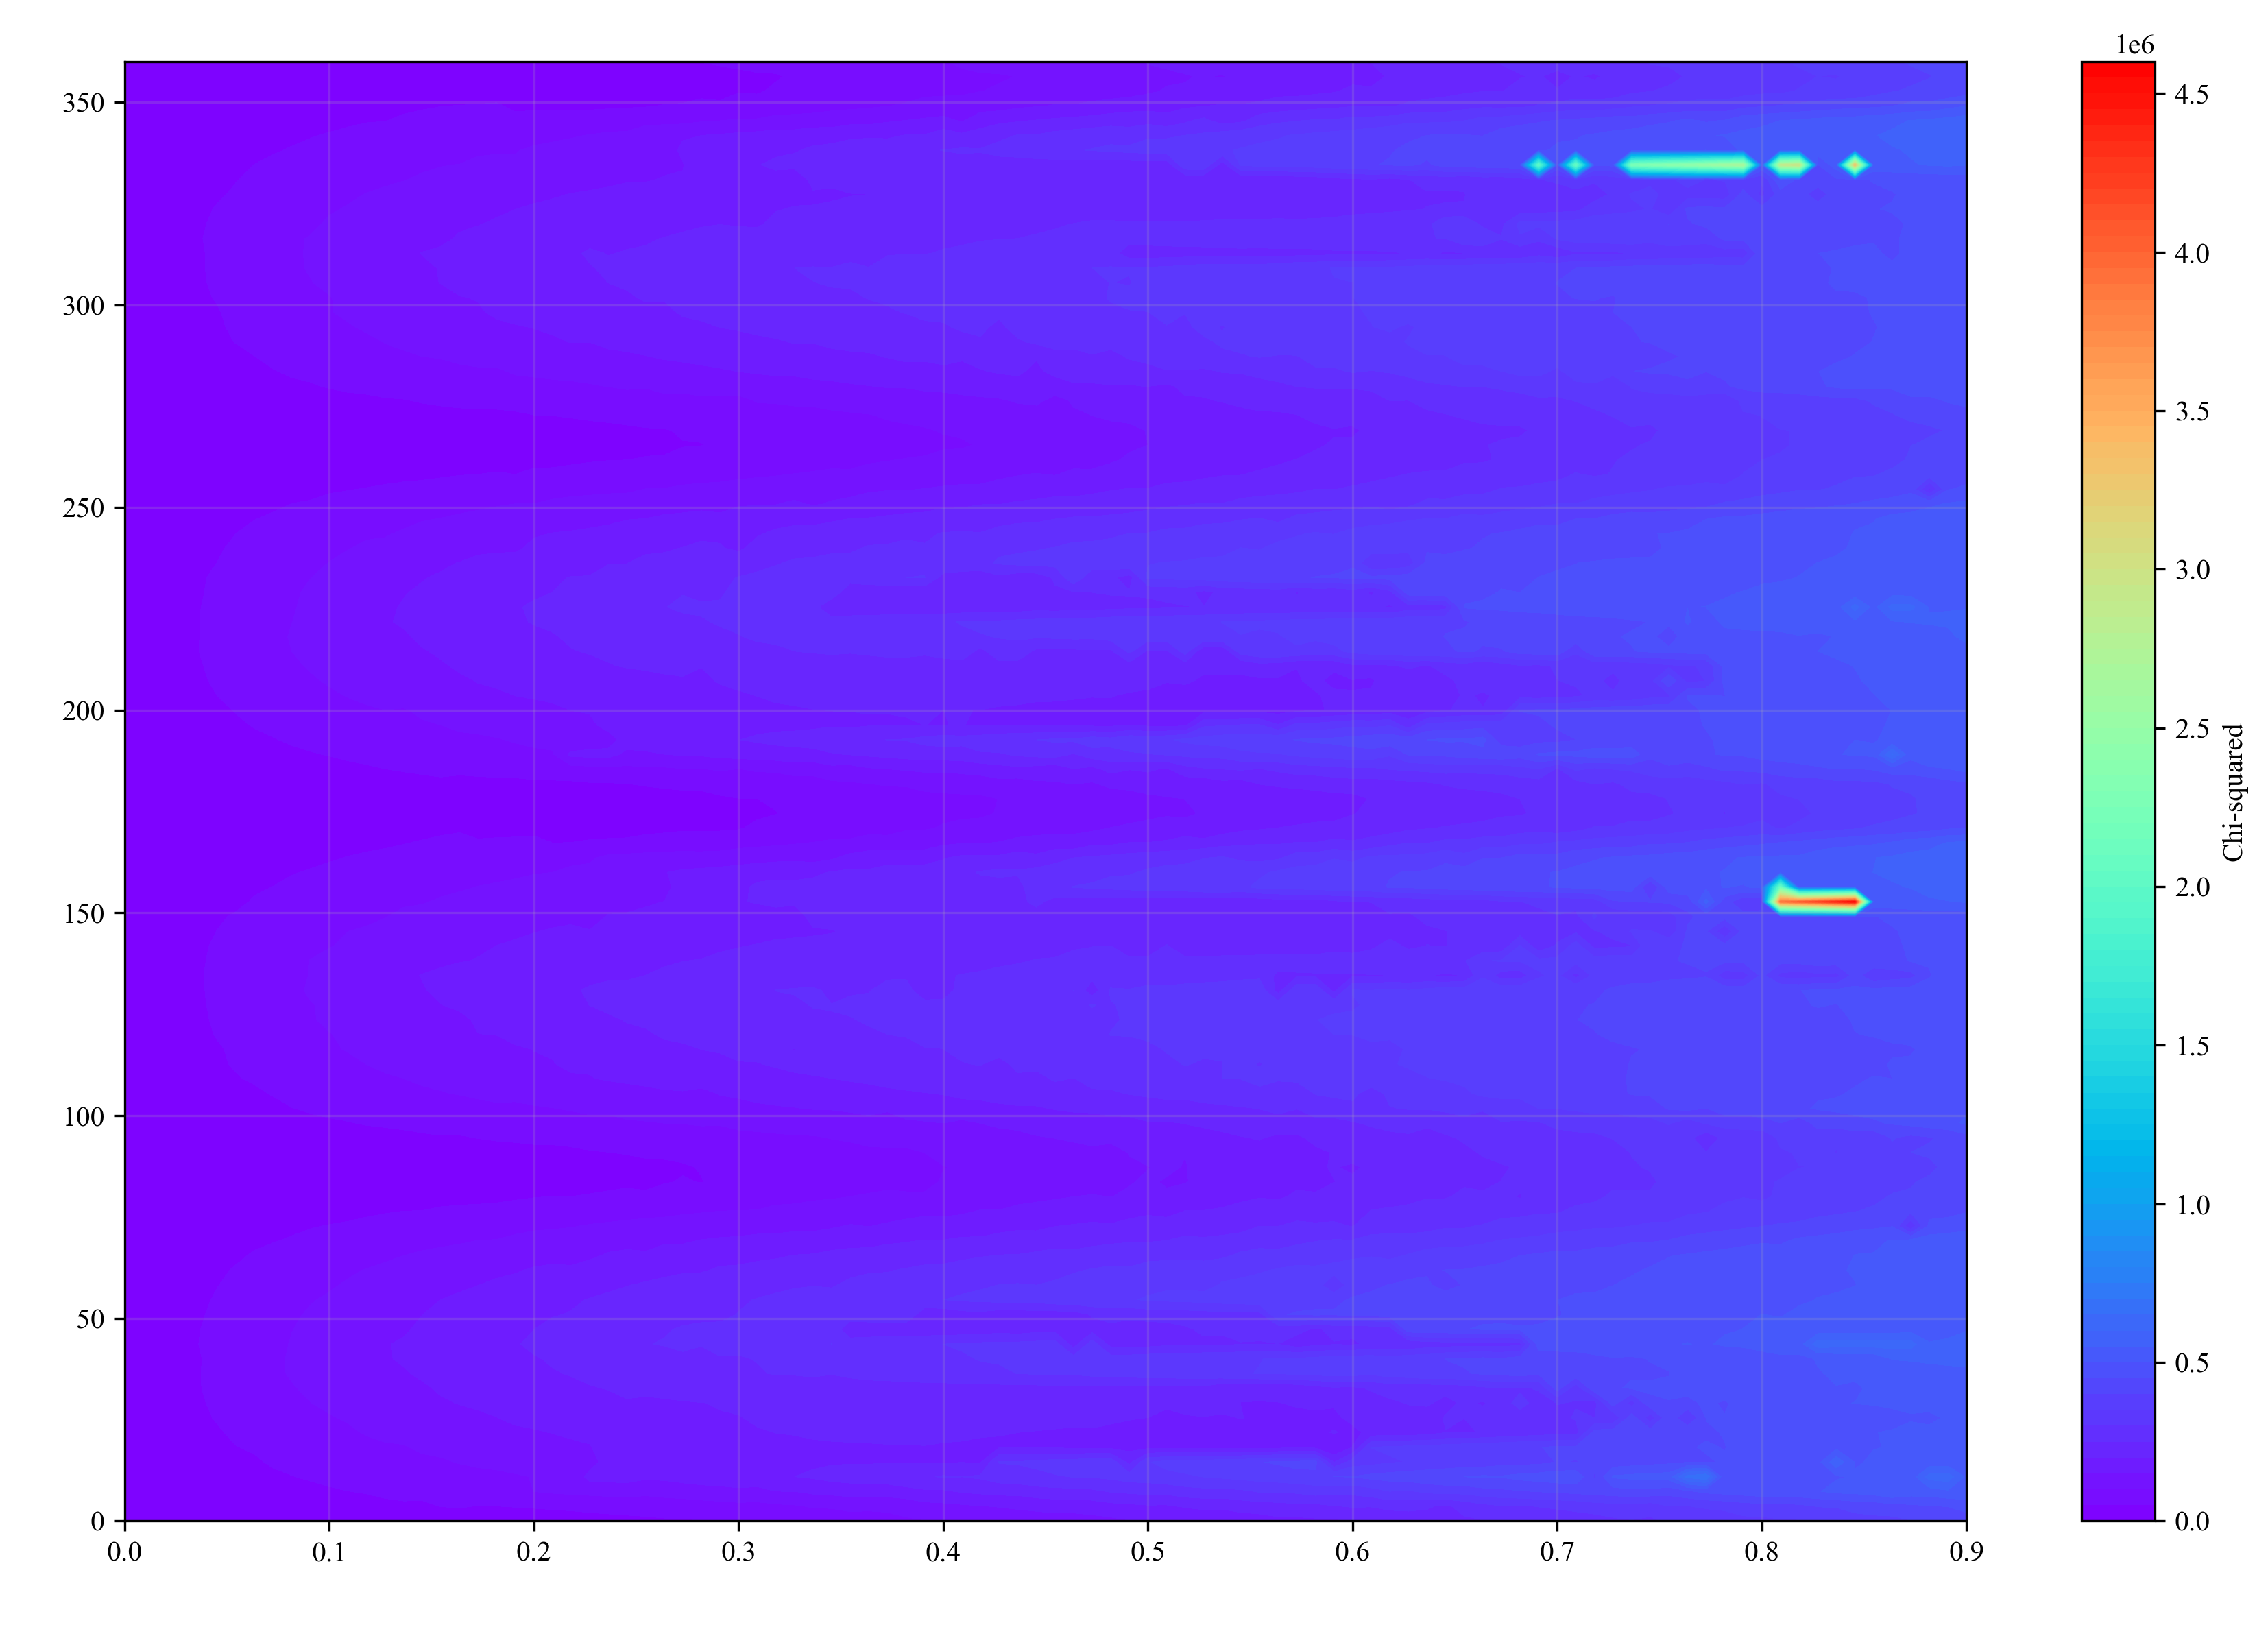

In [43]:
# Create a grid of x and y values
x = data['e'].values
y = data['$θ_{e}$'].values
z = data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow')

# Add a colorbar
plt.colorbar(contour, label='Chi-squared')

# Set labels and title
plt.xlabel('e', color = 'w')
plt.ylabel('$θ_{e}$', color = 'w')
plt.title('Ellipticity v/s PA', color = 'w')

# Set the style for dark theme
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

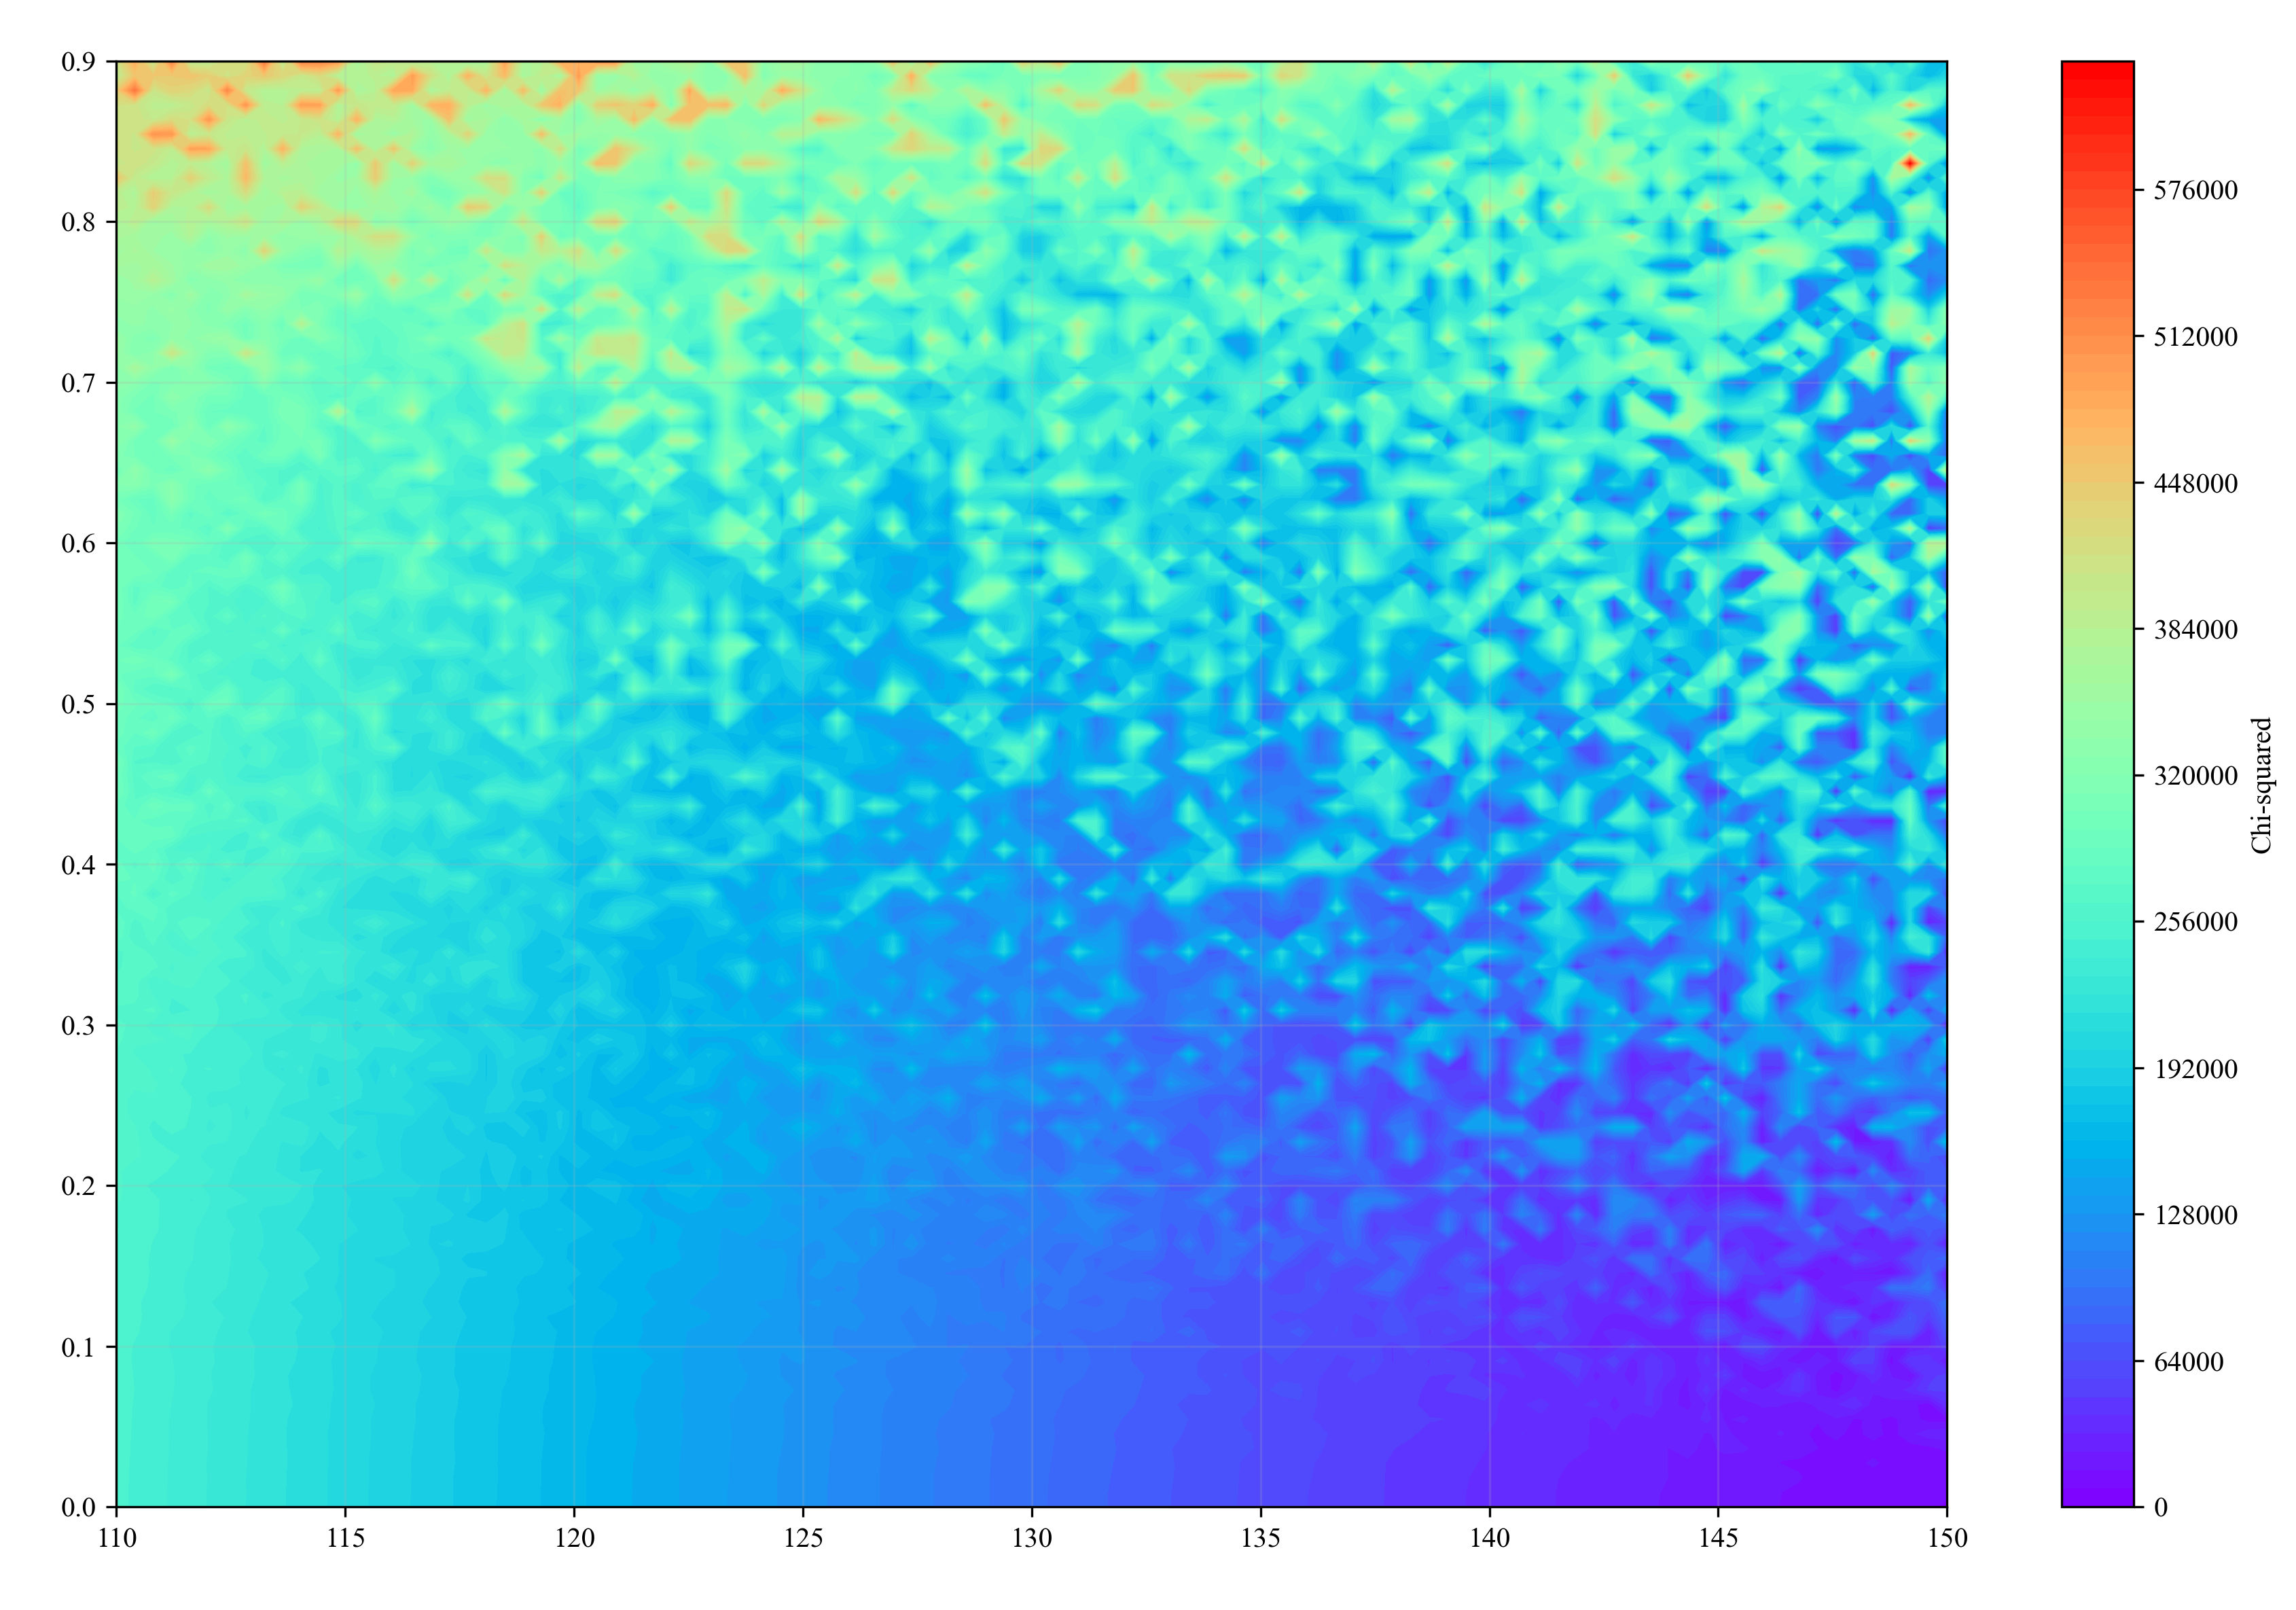

In [47]:
# Create a grid of x and y values
x = data['m'].values
y = data['n'].values
z = data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow')

# Add a colorbar
plt.colorbar(contour, label='Chi-squared')

# Set labels and title
plt.xlabel('e', color = 'w')
plt.ylabel('$θ_{e}$', color = 'w')
plt.title('Ellipticity v/s PA', color = 'w')

# Set the style for dark theme
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
# --- Configuration ---
# Select the variables for the animation
variable_to_animate = '$θ_{e}$' # Column to iterate over for each frame
x_variable = 'e'                  # Column for the x-axis
y_variable = '$\sigma$'             # Column for the y-axis
z_variable = 'chi2'            # Column for the color value (z-axis)
# --- End of Configuration ---


# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_contour_{z_variable}_vs_{x_variable}_{y_variable}_over_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values_to_iterate = sorted(data[variable_to_animate].unique())

# Determine the global range for the z-variable to keep the color bar consistent
z_min = data[z_variable].min()
z_max = data[z_variable].max()

for i, value in enumerate(values_to_iterate):
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's not enough data to create a grid
    if data_subset.shape[0] < 4:
        continue

    # Create a grid of x and y values
    x = data_subset[x_variable].values
    y = data_subset[y_variable].values
    z = data_subset[z_variable].values

    # Remove NaN values from the data
    mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(z)
    x, y, z = x[mask], y[mask], z[mask]
    
    # Skip if not enough valid data points for interpolation
    if len(x) < 4:
        continue

    # Create interpolation grid
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate z values on regular grid
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Create the plot
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow', vmin=z_min, vmax=z_max)
    plt.colorbar(contour, label=z_variable)
    
    # Set labels and title dynamically
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title(f'{z_variable} vs. {x_variable} and {y_variable} for {variable_to_animate} = {value:.2f}')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Adjusted fps for better viewing
    video_filename = f'{SIM_NAME}_{z_variable}_vs_{x_variable}_{y_variable}_over_{variable_to_animate}_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video Sim 1_chi2_vs_e_$\sigma$_over_$θ_{e}$_animation.mov.
MoviePy - Writing video Sim 1_chi2_vs_e_$\sigma$_over_$θ_{e}$_animation.mov



MoviePy - Done !
MoviePy - video ready Sim 1_chi2_vs_e_$\sigma$_over_$θ_{e}$_animation.mov
Video saved as Sim 1_chi2_vs_e_$\sigma$_over_$θ_{e}$_animation.mov


In [68]:
# Select the variable to iterate over for the animation
variable_to_animate = '$\sigma$'

# Select the variable to plot the KDE for
variable_to_plot = 'source_y' # e.g., 'pos_rms', 'mag_rms', 'chi2'

# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_kde_{variable_to_plot}_vs_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values = sorted(data[variable_to_animate].unique())

# Determine the global range for the plotted variable to keep the x-axis consistent
plot_var_min = data[variable_to_plot].min()
plot_var_max = data[variable_to_plot].max()

for i, value in enumerate(values):
    # Filter data for the current value of the chosen animation variable
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's not enough data
    if data_subset.empty:
        continue

    plt.figure(figsize=(8, 4))
    sns.kdeplot(data_subset[variable_to_plot], fill=True)
    
    # Set labels and a dynamic title
    plt.title(f'KDE of {variable_to_plot} for {variable_to_animate} = {value:.2f}')
    plt.xlabel(variable_to_plot)
    plt.ylabel('Density')
    plt.xlim(plot_var_min, plot_var_max) # Keep x-axis consistent
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Slower fps for better viewing
    video_filename = f'{SIM_NAME}_kde_{variable_to_plot}_vs_{variable_to_animate}_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video Sim 1_kde_source_y_vs_$\sigma$_animation.mov.
MoviePy - Writing video Sim 1_kde_source_y_vs_$\sigma$_animation.mov



MoviePy - Done !
MoviePy - video ready Sim 1_kde_source_y_vs_$\sigma$_animation.mov
Video saved as Sim 1_kde_source_y_vs_$\sigma$_animation.mov


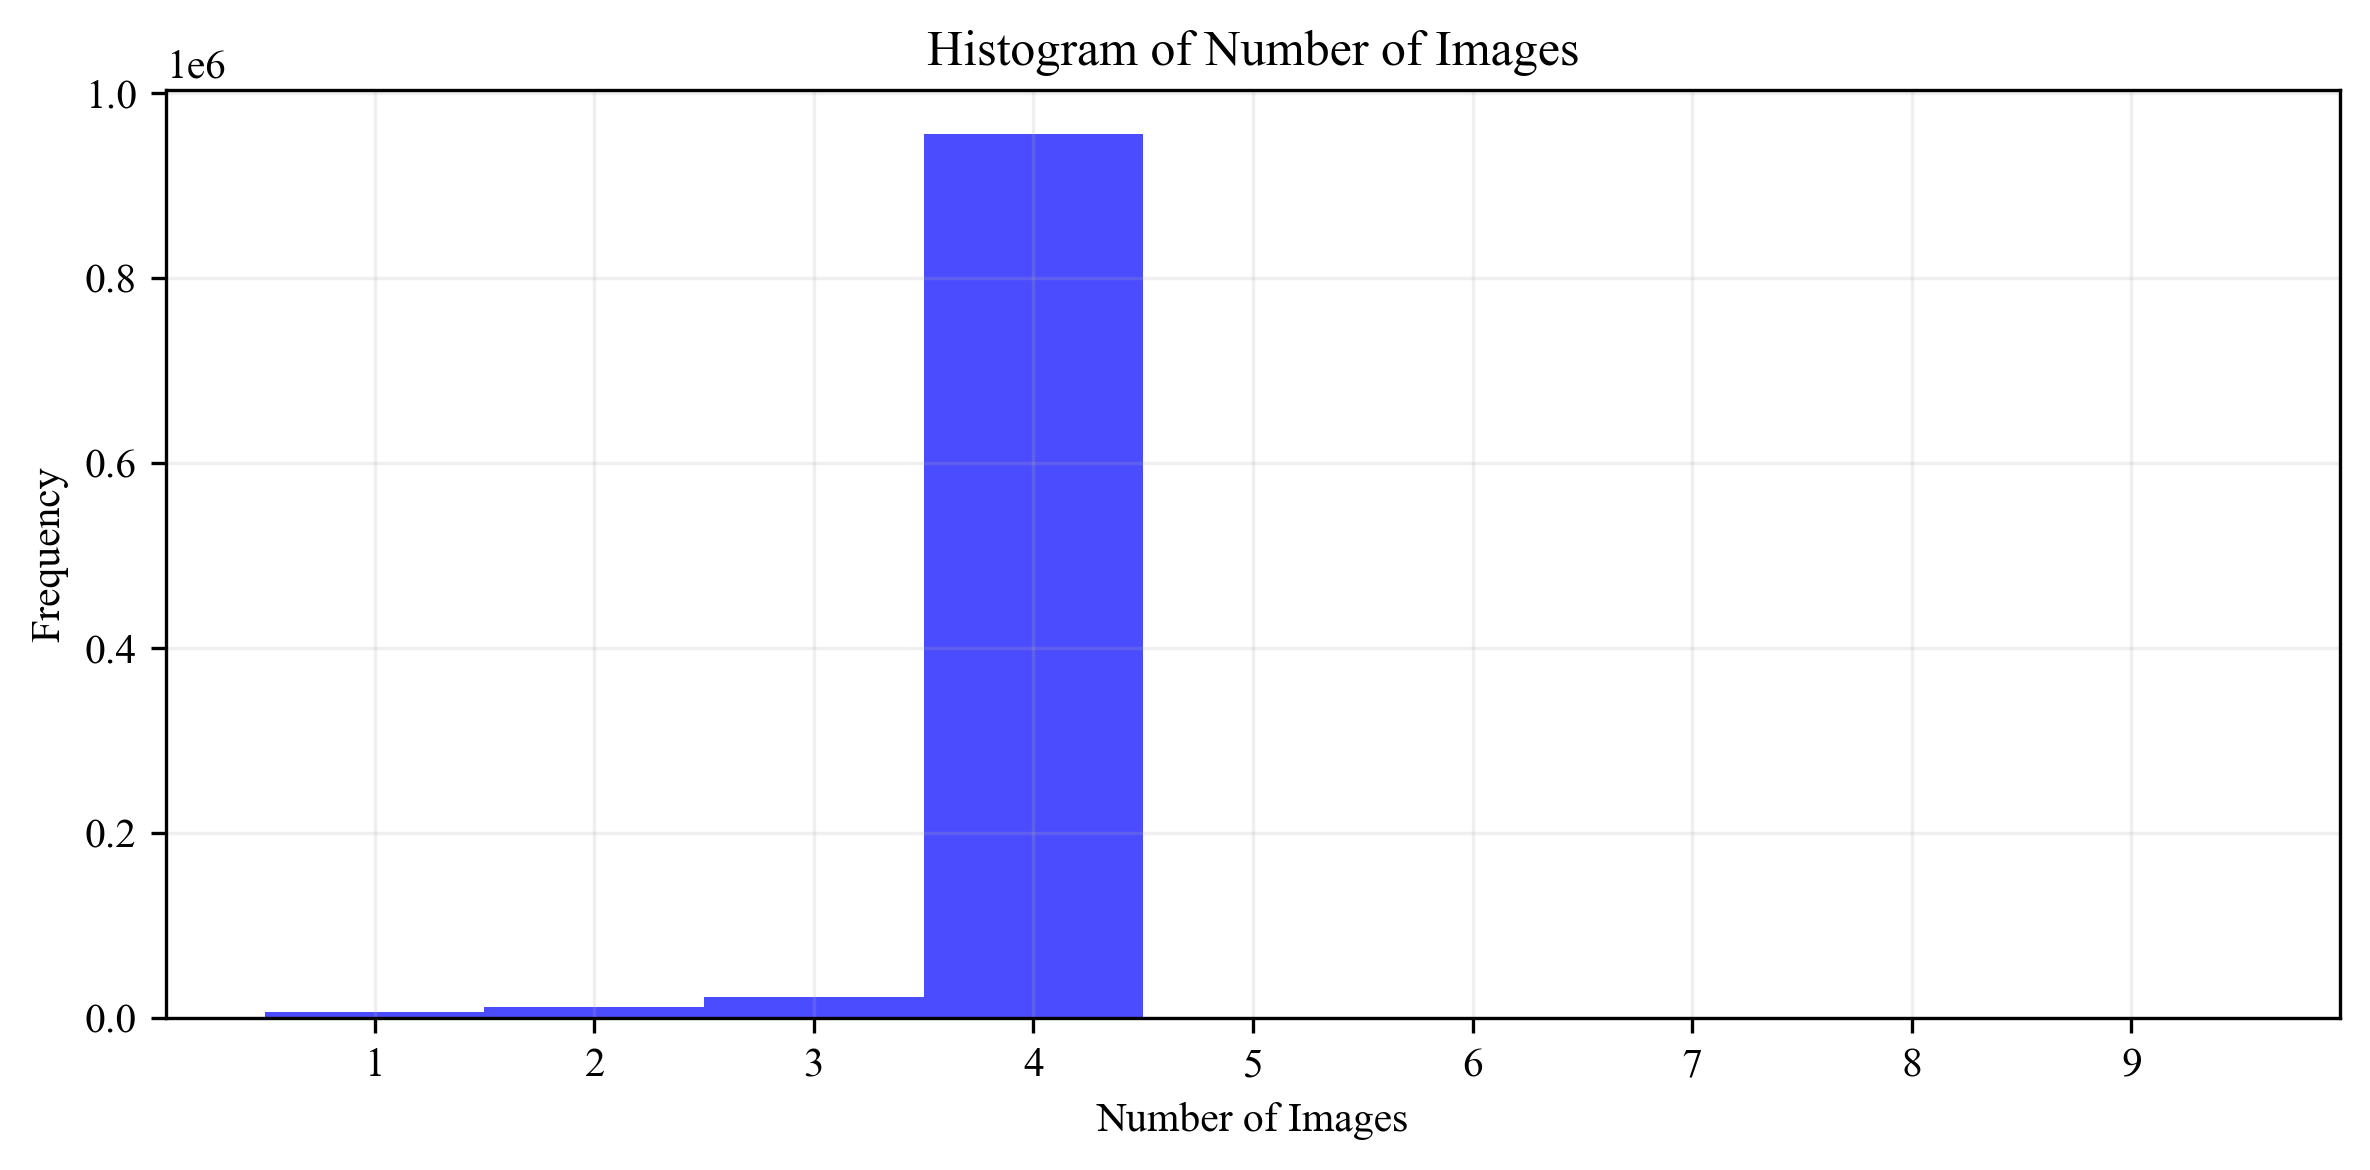

In [78]:
plt.figure(figsize=(8, 4))
plt.hist(data['num_images'], bins=range(1, 11), align='left', color='blue', alpha=0.7)
plt.xticks(range(1, 10))
plt.title('Histogram of Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

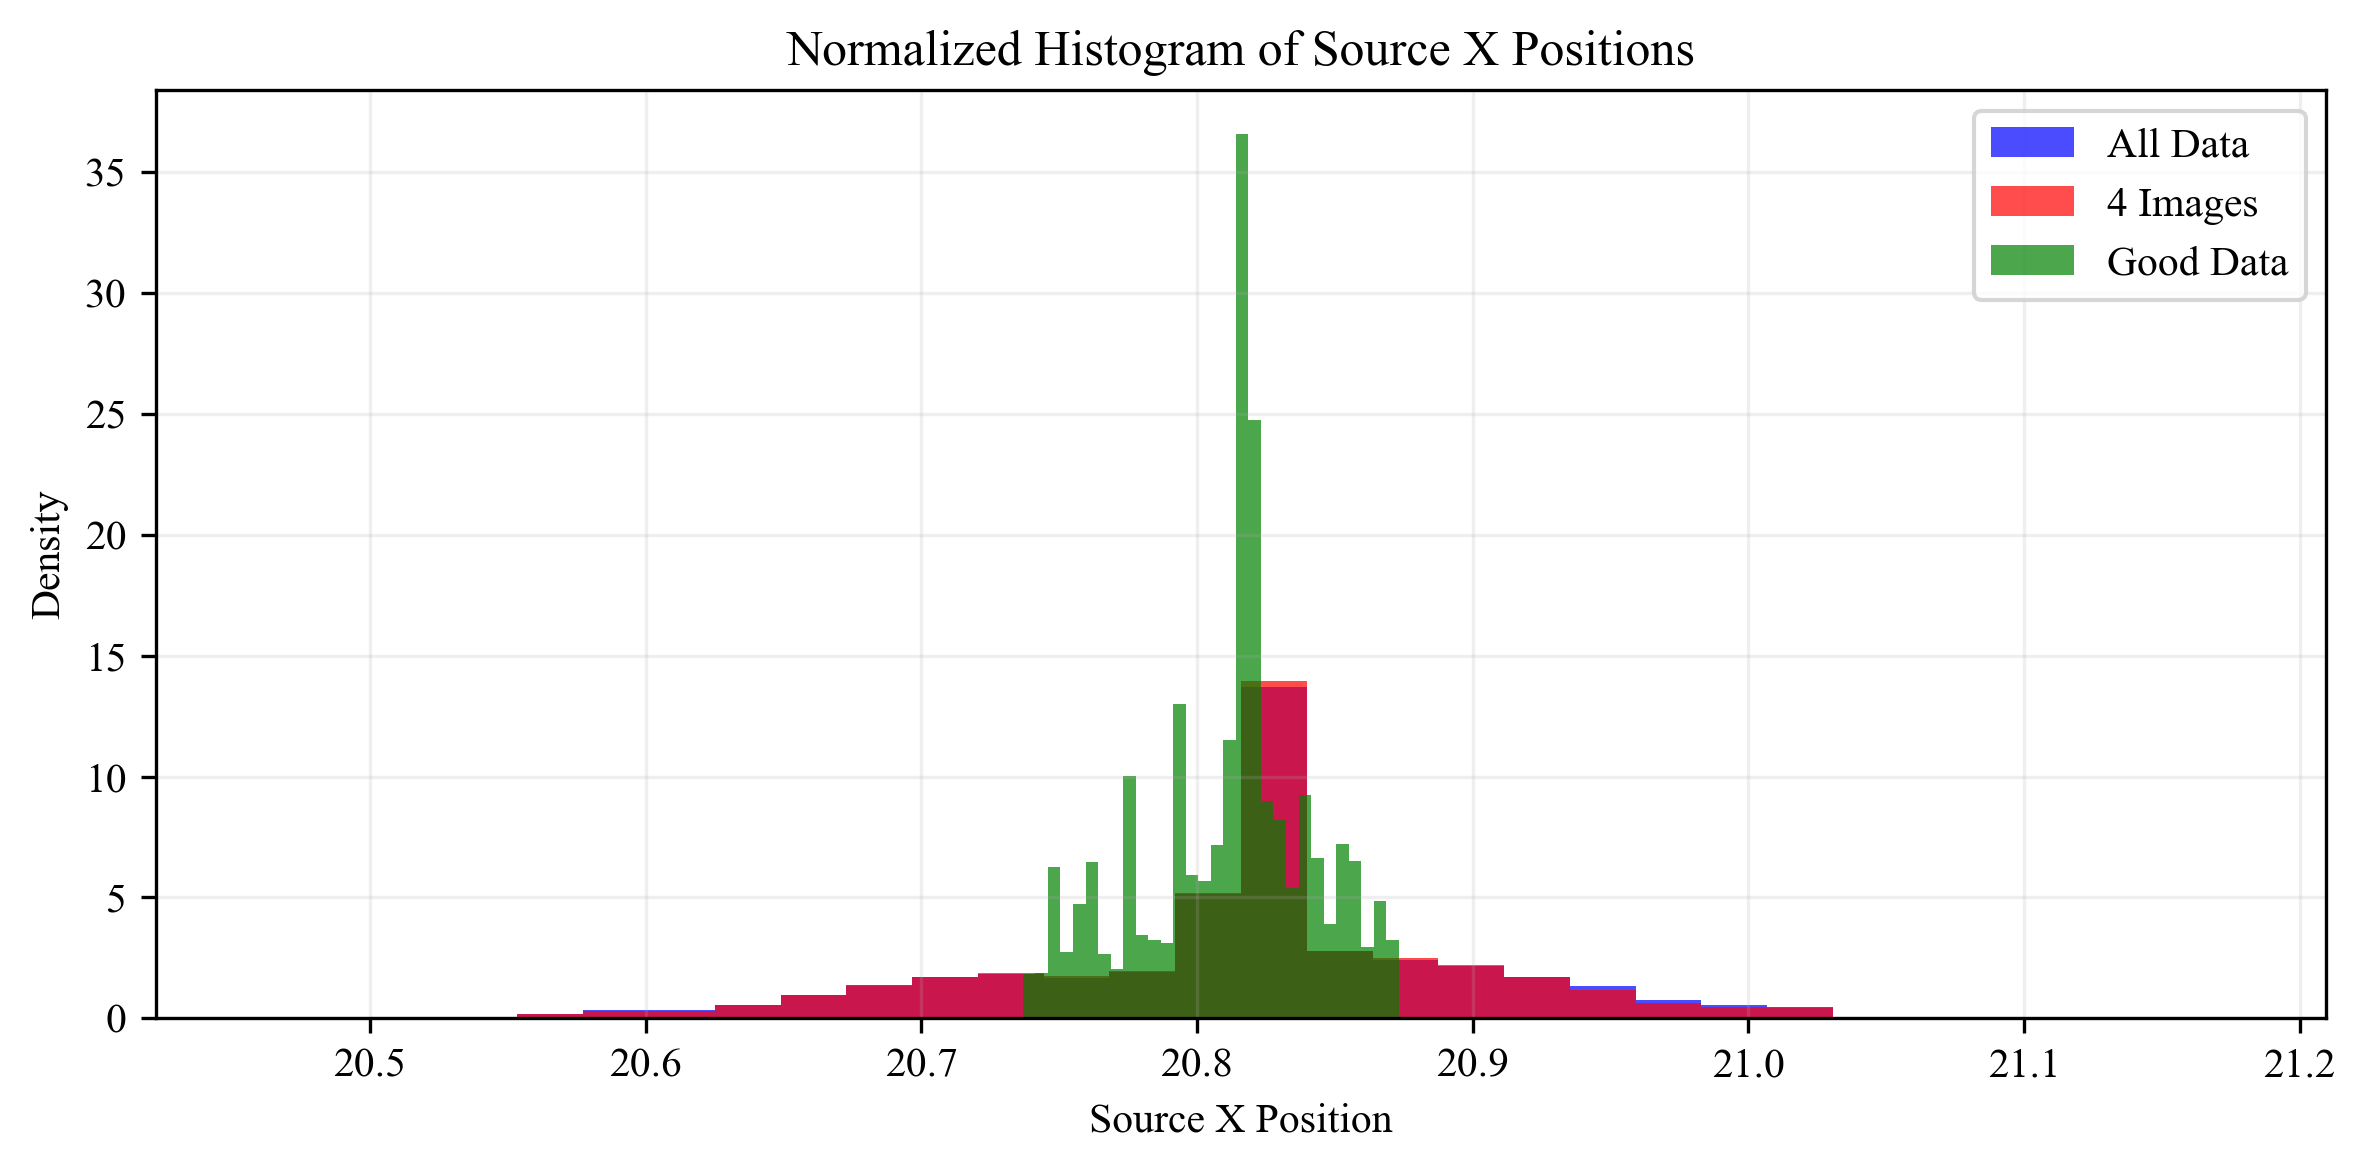

In [92]:
plt.figure(figsize=(8, 4))
plt.hist(data['source_x'], bins=30, color='blue', alpha=0.7, label='All Data', density=True)
plt.hist(data4['source_x'], bins=30, color='red', alpha=0.7, label='4 Images', density=True)
plt.hist(datagood['source_x'], bins=30, color='green', alpha=0.7, label='Good Data', density=True)
plt.title('Normalized Histogram of Source X Positions')
plt.xlabel('Source X Position')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

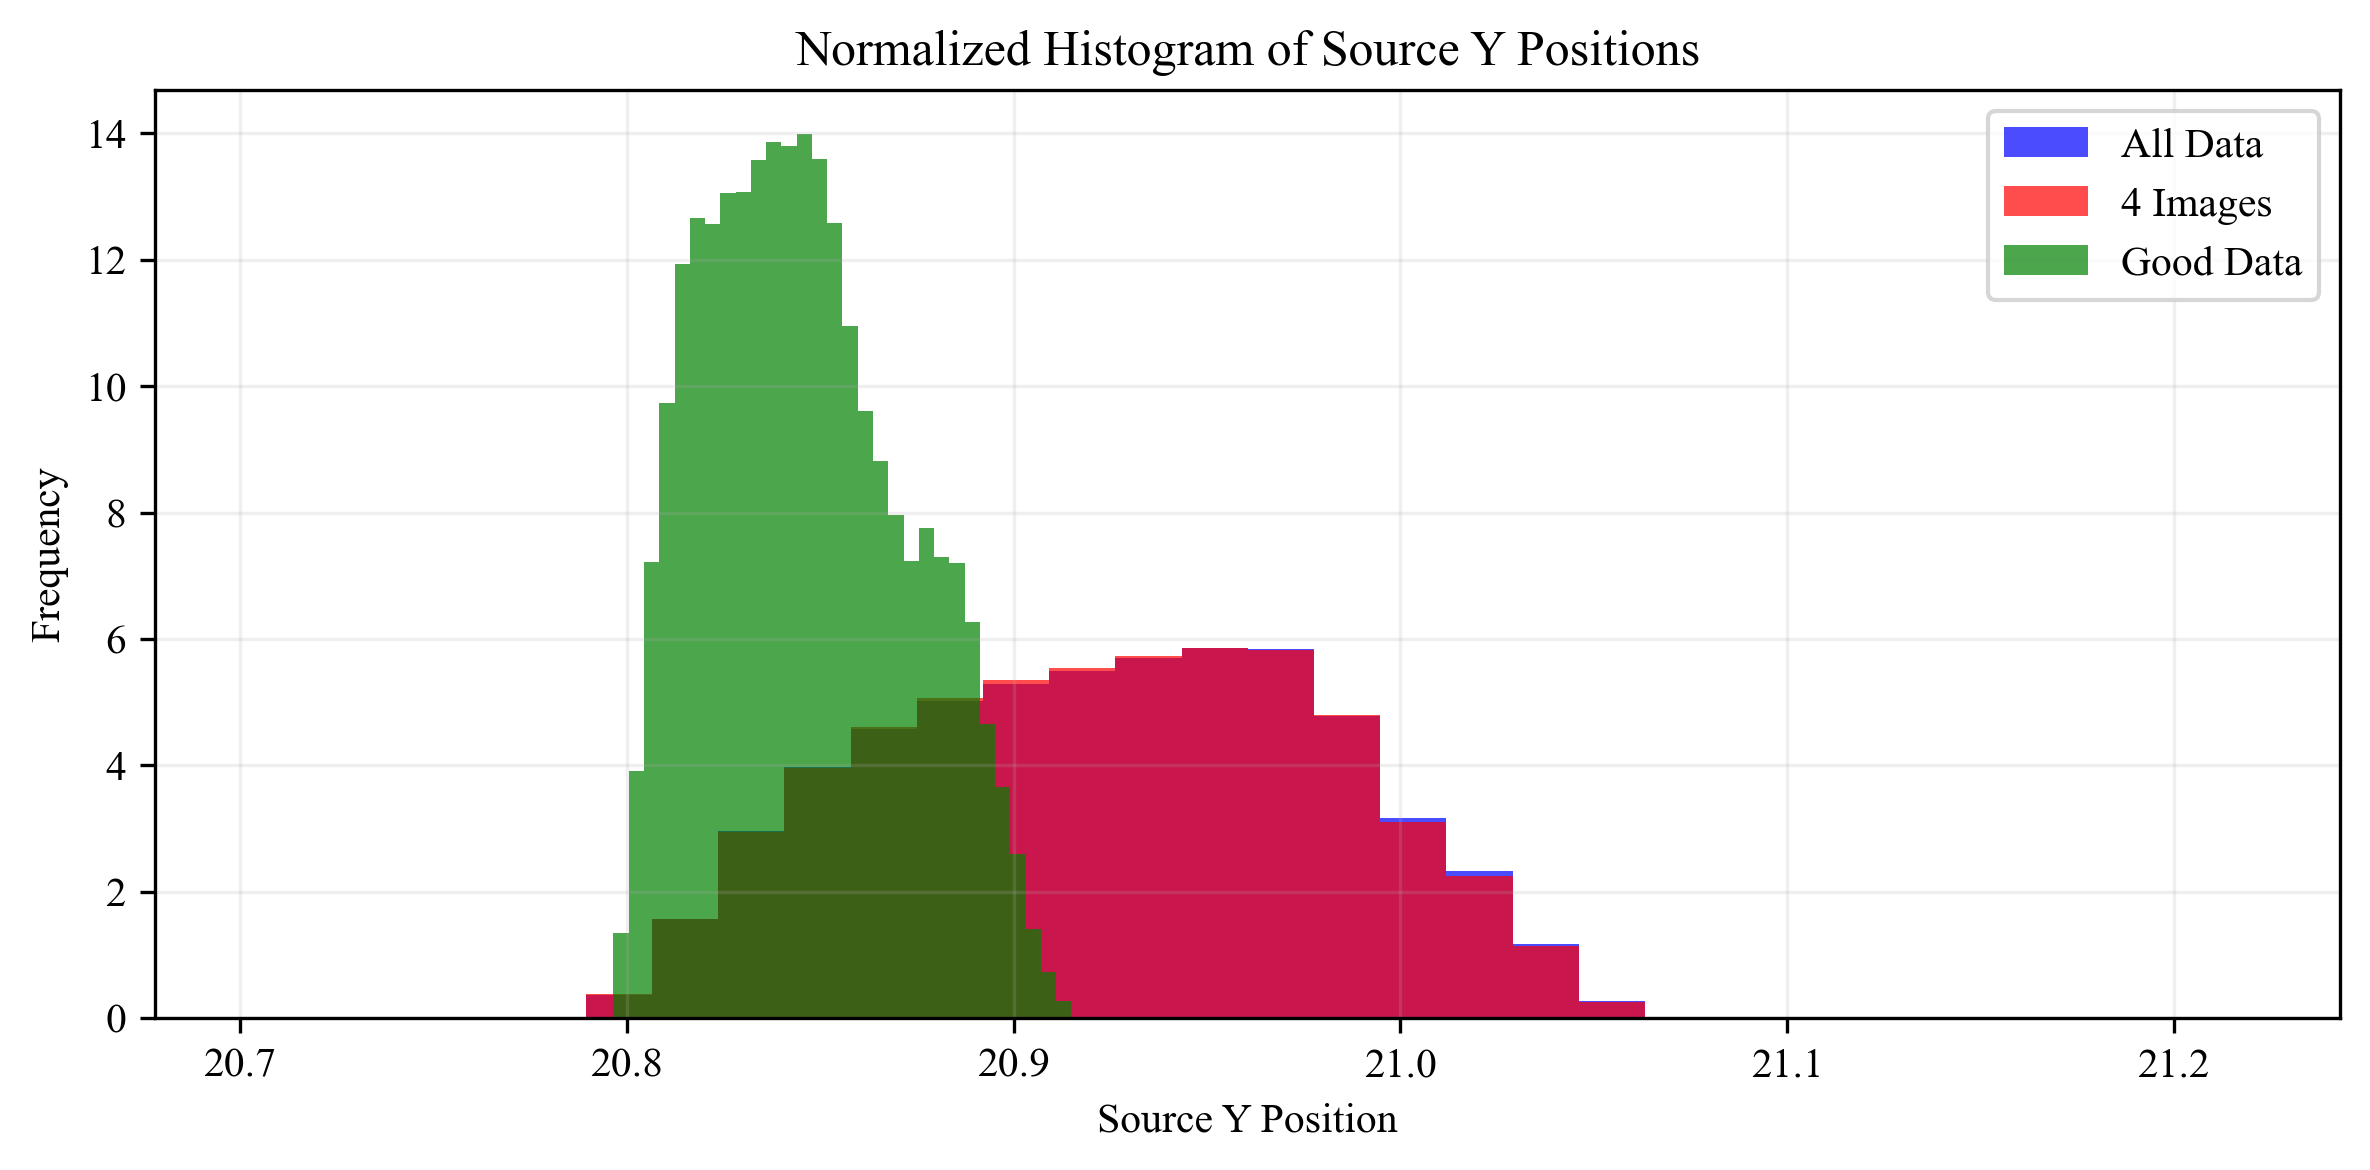

In [95]:
plt.figure(figsize=(8, 4))
plt.hist(data['source_y'], bins=30, color='blue', alpha=0.7, density=True, label='All Data')
plt.hist(data4['source_y'], bins=30, color='red', alpha=0.7, density=True, label='4 Images')
plt.hist(datagood['source_y'], bins=30, color='green', alpha=0.7, density=True, label='Good Data')
plt.title('Normalized Histogram of Source Y Positions')
plt.xlabel('Source Y Position')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()